### Deep Learning ile Makine Ögrenmesi
* 1.Classification
* 2.Regression
* 3.Clustering

## Deep Learning -  1. Clustering

In [1]:
#!pip install tensorflow

In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential #bir siraya koymaya saglicak
from tensorflow.keras.layers import Dense 

In [4]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [5]:
# EDA

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [10]:
y=df[["Outcome"]]

In [11]:
x=df.iloc[:,0:8] # ilk 7 sutün aliyor
y=df.iloc[:,8] # sadece 8. sutün al

In [12]:
x.shape # 8 sutün, yani birinci Layer 8 Nüron koyuyoruz, ikinciye istedigimiz kadar, 500,1000 vb.
#aslinda row 1000den fazla olursa deep learning yoksa classic machine learning burasi sadece ögrenmek icin

(768, 8)

In [13]:
#Aktivasyon Function
#cevabi evet hayir - Sigmoid (genelde son da Sigmoid)
# fazla ise - Softmix
#Regression'da - Linear
#bir den fazla Layer olursa - ReLu (aradaki Hidden Layers)

In [14]:
model=Sequential()
model.add(Dense(8,activation='relu')) # Dense Layer eklemek = 1. Nüronun ikinci Layer'nin bütün nüronlarina baglanmasi
model.add(Dense(12,activation='relu')) # nüron sayisi arttirma basari orani arttiriyor
model.add(Dense(12,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sonu 1 olmasi lazim ve classification oldugu icin sigmoid - output
model.compile(loss="binary_crossentropy",optimizer="adam", metrics="accuracy") #binary= 0 veya 1, Adam=, metrics accuracy

In [15]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1) 
# verbose asagdaki rakamlari gösteriyor, 0 da göstermiyor
#batch-size: bir seferde 10 satir aliyor, verinin bir kismini aliyor isliyor sonra digerini aliyor, degirmen gibi ögütüyür, veriyi isliyor yeni veri aliyor bölük bölük
#epoch= sokakta kac defa gidip geliyor

Epoch 1/150
77/77 [==============================] - 0s 671us/step - loss: 1.3904 - accuracy: 0.4792
Epoch 2/150
77/77 [==============================] - 0s 645us/step - loss: 0.7341 - accuracy: 0.6302
Epoch 3/150
77/77 [==============================] - 0s 645us/step - loss: 0.6923 - accuracy: 0.6484
Epoch 4/150
77/77 [==============================] - 0s 698us/step - loss: 0.6783 - accuracy: 0.6354
Epoch 5/150
77/77 [==============================] - 0s 671us/step - loss: 0.6505 - accuracy: 0.6367
Epoch 6/150
77/77 [==============================] - 0s 671us/step - loss: 0.6318 - accuracy: 0.6484
Epoch 7/150
77/77 [==============================] - 0s 632us/step - loss: 0.6253 - accuracy: 0.6615
Epoch 8/150
77/77 [==============================] - 0s 619us/step - loss: 0.6233 - accuracy: 0.6641
Epoch 9/150
77/77 [==============================] - 0s 619us/step - loss: 0.6239 - accuracy: 0.6784
Epoch 10/150
77/77 [==============================] - 0s 619us/step - loss: 0.6211 - accura

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 4)                 52        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [17]:
scores=model.evaluate(x,y)

24/24 [==============================] - 0s 565us/step - loss: 0.4840 - accuracy: 0.7708


In [18]:
scores[0] # loss

0.48397183418273926

In [19]:
scores[1] # accuracy

0.7708333134651184

In [20]:
# Early stopping - 150 epoch güzel tahmin etmisiz ama gercekte 75 ideal mis, ozmn 75 de durmasi daha mantikli

In [24]:
history=model.fit(x,y,epochs=19,validation_split=0.20,batch_size=10,verbose=1) 
# train test split yerine burda validation split -> test yerine validation kelimesi

Epoch 1/19
62/62 [==============================] - 0s 1ms/step - loss: 0.4338 - accuracy: 0.7964 - val_loss: 0.5416 - val_accuracy: 0.7468
Epoch 2/19
62/62 [==============================] - 0s 918us/step - loss: 0.4457 - accuracy: 0.7736 - val_loss: 0.5487 - val_accuracy: 0.7597
Epoch 3/19
62/62 [==============================] - 0s 959us/step - loss: 0.4426 - accuracy: 0.7997 - val_loss: 0.5549 - val_accuracy: 0.7727
Epoch 4/19
62/62 [==============================] - 0s 918us/step - loss: 0.4342 - accuracy: 0.7866 - val_loss: 0.5582 - val_accuracy: 0.7403
Epoch 5/19
62/62 [==============================] - 0s 935us/step - loss: 0.4373 - accuracy: 0.7932 - val_loss: 0.5376 - val_accuracy: 0.7727
Epoch 6/19
62/62 [==============================] - 0s 935us/step - loss: 0.4353 - accuracy: 0.8046 - val_loss: 0.5550 - val_accuracy: 0.7403
Epoch 7/19
62/62 [==============================] - 0s 967us/step - loss: 0.4333 - accuracy: 0.7899 - val_loss: 0.5646 - val_accuracy: 0.7338
Epoch 8/

In [25]:
import matplotlib.pyplot as plt

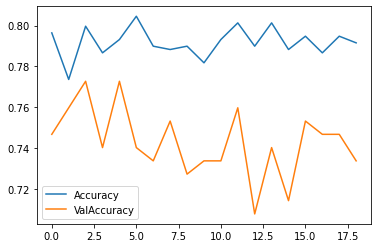

In [26]:
plt.plot(history.history["accuracy"],label="Accuracy")
plt.plot(history.history["val_accuracy"],label="ValAccuracy")
plt.legend();

In [27]:
#Regression örnegi - pickel

## Deep Learning - 2. Regression

In [32]:
import pandas as pd
pd.set_option("display.max_columns",100)

In [33]:
df=pd.read_pickle("kc_house.pkl") # Datei mit Feature Engineering von vorher mit sparse matrix

In [34]:
df.head()

,bedrooms,bathrooms,sqft_living,grade,view,basement,waterfront,floors,age,renovated,condition,sqft_above,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,0,1.0,65,0,3,1180,221900.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,9,5.0625,2570,7,0,1,0,2.0,69,1,3,2170,538000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,1.0000,770,6,0,0,0,1.0,87,0,3,770,180000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16,9.0000,1960,7,0,1,0,1.0,55,0,5,1050,604000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,9,4.0000,1680,8,0,0,0,1.0,33,0,3,1680,510000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
x=df.drop("price",axis=1)
y=df[["price"]]

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [69]:
model=Sequential()
model.add(Dense(19,activation='relu')) #Dense bütün nüronlar birbirne baglandi demek
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1)) # regression oldugu icin sigmoid yok
model.compile(optimizer="adam",loss="mse") #regression'da loss mse
#regressionda büyükten baslayip kücüge gitmek usul dir
#bastaki sutün sayisi sonra düsecek - regression icin örnek
#nüronlari arttirmak basari arttirabilir, baska optimizer olabilir

In [70]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=1500)
model.summary()

Epoch 1/1500
119/119 [==============================] - 1s 2ms/step - loss: 267493965824.0000 - val_loss: 218579517440.0000
Epoch 2/1500
119/119 [==============================] - 0s 915us/step - loss: 69888057344.0000 - val_loss: 33990010880.0000
Epoch 3/1500
119/119 [==============================] - 0s 890us/step - loss: 33495398400.0000 - val_loss: 33655810048.0000
Epoch 4/1500
119/119 [==============================] - 0s 915us/step - loss: 33074978816.0000 - val_loss: 33103226880.0000
Epoch 5/1500
119/119 [==============================] - 0s 911us/step - loss: 32432609280.0000 - val_loss: 32473255936.0000
Epoch 6/1500
119/119 [==============================] - 0s 899us/step - loss: 31752597504.0000 - val_loss: 31899398144.0000
Epoch 7/1500
119/119 [==============================] - 0s 907us/step - loss: 31150225408.0000 - val_loss: 31318484992.0000
Epoch 8/1500
119/119 [==============================] - 0s 907us/step - loss: 30593871872.0000 - val_loss: 30796503040.0000
Epoch 9/

119/119 [==============================] - 0s 899us/step - loss: 10803812352.0000 - val_loss: 11683528704.0000
Epoch 132/1500
119/119 [==============================] - 0s 907us/step - loss: 10653323264.0000 - val_loss: 11843921920.0000
Epoch 133/1500
119/119 [==============================] - 0s 932us/step - loss: 10798589952.0000 - val_loss: 11399226368.0000
Epoch 134/1500
119/119 [==============================] - 0s 941us/step - loss: 10775851008.0000 - val_loss: 11502490624.0000
Epoch 135/1500
119/119 [==============================] - 0s 915us/step - loss: 10785239040.0000 - val_loss: 11511454720.0000
Epoch 136/1500
119/119 [==============================] - 0s 882us/step - loss: 10559508480.0000 - val_loss: 11488752640.0000
Epoch 137/1500
119/119 [==============================] - 0s 907us/step - loss: 10484424704.0000 - val_loss: 11259029504.0000
Epoch 138/1500
119/119 [==============================] - 0s 941us/step - loss: 10586207232.0000 - val_loss: 11268918272.0000
Epoch 1

Epoch 262/1500
119/119 [==============================] - 0s 924us/step - loss: 9114932224.0000 - val_loss: 9772966912.0000
Epoch 263/1500
119/119 [==============================] - 0s 907us/step - loss: 9074997248.0000 - val_loss: 9702352896.0000
Epoch 264/1500
119/119 [==============================] - 0s 907us/step - loss: 9043078144.0000 - val_loss: 9676362752.0000
Epoch 265/1500
119/119 [==============================] - 0s 907us/step - loss: 9020267520.0000 - val_loss: 9615594496.0000
Epoch 266/1500
119/119 [==============================] - 0s 932us/step - loss: 9135263744.0000 - val_loss: 9609654272.0000
Epoch 267/1500
119/119 [==============================] - 0s 924us/step - loss: 9070520320.0000 - val_loss: 10064950272.0000
Epoch 268/1500
119/119 [==============================] - 0s 907us/step - loss: 9198440448.0000 - val_loss: 10395586560.0000
Epoch 269/1500
119/119 [==============================] - 0s 941us/step - loss: 8899815424.0000 - val_loss: 11237883904.0000
Epoch

119/119 [==============================] - 0s 915us/step - loss: 8851022848.0000 - val_loss: 9615311872.0000
Epoch 329/1500
119/119 [==============================] - 0s 890us/step - loss: 8744058880.0000 - val_loss: 9173365760.0000
Epoch 330/1500
119/119 [==============================] - 0s 907us/step - loss: 8791812096.0000 - val_loss: 10089778176.0000
Epoch 331/1500
119/119 [==============================] - 0s 924us/step - loss: 8783263744.0000 - val_loss: 9145823232.0000
Epoch 332/1500
119/119 [==============================] - 0s 924us/step - loss: 8644219904.0000 - val_loss: 9743158272.0000
Epoch 333/1500
119/119 [==============================] - 0s 899us/step - loss: 8798425088.0000 - val_loss: 9155401728.0000
Epoch 334/1500
119/119 [==============================] - 0s 890us/step - loss: 8663166976.0000 - val_loss: 9193310208.0000
Epoch 335/1500
119/119 [==============================] - 0s 924us/step - loss: 8819411968.0000 - val_loss: 10621405184.0000
Epoch 336/1500
119/11

119/119 [==============================] - 0s 907us/step - loss: 8357520384.0000 - val_loss: 9102305280.0000
Epoch 461/1500
119/119 [==============================] - 0s 949us/step - loss: 8369983488.0000 - val_loss: 9170941952.0000
Epoch 462/1500
119/119 [==============================] - 0s 1ms/step - loss: 8351813120.0000 - val_loss: 8786854912.0000
Epoch 463/1500
119/119 [==============================] - 0s 941us/step - loss: 8260051968.0000 - val_loss: 8793055232.0000
Epoch 464/1500
119/119 [==============================] - 0s 899us/step - loss: 8401717248.0000 - val_loss: 9337548800.0000
Epoch 465/1500
119/119 [==============================] - 0s 907us/step - loss: 8366192128.0000 - val_loss: 8905553920.0000
Epoch 466/1500
119/119 [==============================] - 0s 890us/step - loss: 8400689664.0000 - val_loss: 8844296192.0000
Epoch 467/1500
119/119 [==============================] - 0s 907us/step - loss: 8373913088.0000 - val_loss: 8978497536.0000
Epoch 468/1500
119/119 [=

119/119 [==============================] - 0s 890us/step - loss: 8055702016.0000 - val_loss: 8596483072.0000
Epoch 593/1500
119/119 [==============================] - 0s 873us/step - loss: 7992933888.0000 - val_loss: 9264566272.0000
Epoch 594/1500
119/119 [==============================] - 0s 873us/step - loss: 8196692992.0000 - val_loss: 8661779456.0000
Epoch 595/1500
119/119 [==============================] - 0s 899us/step - loss: 8216374784.0000 - val_loss: 8664279040.0000
Epoch 596/1500
119/119 [==============================] - 0s 890us/step - loss: 8140709376.0000 - val_loss: 8675821568.0000
Epoch 597/1500
119/119 [==============================] - 0s 882us/step - loss: 8178484224.0000 - val_loss: 10931662848.0000
Epoch 598/1500
119/119 [==============================] - 0s 873us/step - loss: 8078240768.0000 - val_loss: 9045493760.0000
Epoch 599/1500
119/119 [==============================] - 0s 882us/step - loss: 8157056000.0000 - val_loss: 8704375808.0000
Epoch 600/1500
119/119

119/119 [==============================] - 0s 915us/step - loss: 7941069312.0000 - val_loss: 9025911808.0000
Epoch 725/1500
119/119 [==============================] - 0s 915us/step - loss: 8095791616.0000 - val_loss: 9501606912.0000
Epoch 726/1500
119/119 [==============================] - 0s 907us/step - loss: 7855808512.0000 - val_loss: 8646056960.0000
Epoch 727/1500
119/119 [==============================] - 0s 915us/step - loss: 7868987392.0000 - val_loss: 9680772096.0000
Epoch 728/1500
119/119 [==============================] - 0s 966us/step - loss: 8143501824.0000 - val_loss: 9086019584.0000
Epoch 729/1500
119/119 [==============================] - 0s 1ms/step - loss: 8119524864.0000 - val_loss: 8822132736.0000
Epoch 730/1500
119/119 [==============================] - 0s 907us/step - loss: 8027466752.0000 - val_loss: 8660624384.0000
Epoch 731/1500
119/119 [==============================] - 0s 924us/step - loss: 7803320832.0000 - val_loss: 8460528640.0000
Epoch 732/1500
119/119 [=

119/119 [==============================] - 0s 924us/step - loss: 7758674432.0000 - val_loss: 9717478400.0000
Epoch 857/1500
119/119 [==============================] - 0s 890us/step - loss: 7927993856.0000 - val_loss: 8440267264.0000
Epoch 858/1500
119/119 [==============================] - 0s 899us/step - loss: 7803972096.0000 - val_loss: 8605481984.0000
Epoch 859/1500
119/119 [==============================] - 0s 882us/step - loss: 7642932736.0000 - val_loss: 8379508736.0000
Epoch 860/1500
119/119 [==============================] - 0s 907us/step - loss: 7970801152.0000 - val_loss: 8712188928.0000
Epoch 861/1500
119/119 [==============================] - 0s 898us/step - loss: 7695992832.0000 - val_loss: 8896599040.0000
Epoch 862/1500
119/119 [==============================] - 0s 880us/step - loss: 7915768832.0000 - val_loss: 8775883776.0000
Epoch 863/1500
119/119 [==============================] - 0s 890us/step - loss: 7753371136.0000 - val_loss: 8530094080.0000
Epoch 864/1500
119/119 

119/119 [==============================] - 0s 932us/step - loss: 7642101248.0000 - val_loss: 8381873152.0000
Epoch 989/1500
119/119 [==============================] - 0s 924us/step - loss: 7651625984.0000 - val_loss: 8367937024.0000
Epoch 990/1500
119/119 [==============================] - 0s 932us/step - loss: 7640488960.0000 - val_loss: 8564531200.0000
Epoch 991/1500
119/119 [==============================] - 0s 915us/step - loss: 7916409856.0000 - val_loss: 9868774400.0000
Epoch 992/1500
119/119 [==============================] - 0s 890us/step - loss: 7675005440.0000 - val_loss: 8502346752.0000
Epoch 993/1500
119/119 [==============================] - 0s 915us/step - loss: 7573843968.0000 - val_loss: 8367115264.0000
Epoch 994/1500
119/119 [==============================] - 0s 899us/step - loss: 7723092480.0000 - val_loss: 8287999488.0000
Epoch 995/1500
119/119 [==============================] - 0s 890us/step - loss: 7642644480.0000 - val_loss: 8347116544.0000
Epoch 996/1500
119/119 

Epoch 1054/1500
119/119 [==============================] - 0s 882us/step - loss: 7648416256.0000 - val_loss: 8402789888.0000
Epoch 1055/1500
119/119 [==============================] - 0s 907us/step - loss: 7765453824.0000 - val_loss: 8760378368.0000
Epoch 1056/1500
119/119 [==============================] - 0s 899us/step - loss: 7580728832.0000 - val_loss: 8310127616.0000
Epoch 1057/1500
119/119 [==============================] - 0s 907us/step - loss: 7582121472.0000 - val_loss: 8300337152.0000
Epoch 1058/1500
119/119 [==============================] - 0s 899us/step - loss: 7735949824.0000 - val_loss: 8619939840.0000
Epoch 1059/1500
119/119 [==============================] - 0s 907us/step - loss: 7473017344.0000 - val_loss: 8343745024.0000
Epoch 1060/1500
119/119 [==============================] - 0s 932us/step - loss: 8064081408.0000 - val_loss: 8514418176.0000
Epoch 1061/1500
119/119 [==============================] - 0s 899us/step - loss: 7540172800.0000 - val_loss: 8764641280.0000


119/119 [==============================] - 0s 907us/step - loss: 7552054272.0000 - val_loss: 8914244608.0000
Epoch 1185/1500
119/119 [==============================] - 0s 915us/step - loss: 7634262016.0000 - val_loss: 8329146880.0000
Epoch 1186/1500
119/119 [==============================] - 0s 882us/step - loss: 7539668480.0000 - val_loss: 8706607104.0000
Epoch 1187/1500
119/119 [==============================] - 0s 915us/step - loss: 7467780608.0000 - val_loss: 8219143168.0000
Epoch 1188/1500
119/119 [==============================] - 0s 907us/step - loss: 7482017792.0000 - val_loss: 8474461184.0000
Epoch 1189/1500
119/119 [==============================] - 0s 907us/step - loss: 7758200832.0000 - val_loss: 8275951104.0000
Epoch 1190/1500
119/119 [==============================] - 0s 899us/step - loss: 7458494464.0000 - val_loss: 8280114176.0000
Epoch 1191/1500
119/119 [==============================] - 0s 907us/step - loss: 7542909440.0000 - val_loss: 8744323072.0000
Epoch 1192/1500


119/119 [==============================] - 0s 932us/step - loss: 7564465664.0000 - val_loss: 8223506432.0000
Epoch 1315/1500
119/119 [==============================] - 0s 890us/step - loss: 7355409408.0000 - val_loss: 8334928896.0000
Epoch 1316/1500
119/119 [==============================] - 0s 908us/step - loss: 7492904448.0000 - val_loss: 8219943936.0000
Epoch 1317/1500
119/119 [==============================] - 0s 899us/step - loss: 7538353664.0000 - val_loss: 8248207872.0000
Epoch 1318/1500
119/119 [==============================] - 0s 907us/step - loss: 7545575936.0000 - val_loss: 8180801024.0000
Epoch 1319/1500
119/119 [==============================] - 0s 899us/step - loss: 7465430016.0000 - val_loss: 8154198528.0000
Epoch 1320/1500
119/119 [==============================] - 0s 907us/step - loss: 7428536320.0000 - val_loss: 8261185536.0000
Epoch 1321/1500
119/119 [==============================] - 0s 944us/step - loss: 7408278016.0000 - val_loss: 8368733696.0000
Epoch 1322/1500


119/119 [==============================] - 0s 890us/step - loss: 7557399040.0000 - val_loss: 8927130624.0000
Epoch 1445/1500
119/119 [==============================] - 0s 899us/step - loss: 7393496576.0000 - val_loss: 8174564864.0000
Epoch 1446/1500
119/119 [==============================] - 0s 907us/step - loss: 7547976192.0000 - val_loss: 8304657920.0000
Epoch 1447/1500
119/119 [==============================] - 0s 890us/step - loss: 7407886336.0000 - val_loss: 9181953024.0000
Epoch 1448/1500
119/119 [==============================] - 0s 890us/step - loss: 7583733760.0000 - val_loss: 8118028800.0000
Epoch 1449/1500
119/119 [==============================] - 0s 907us/step - loss: 7403977216.0000 - val_loss: 8298650112.0000
Epoch 1450/1500
119/119 [==============================] - 0s 890us/step - loss: 7496438272.0000 - val_loss: 8095347200.0000
Epoch 1451/1500
119/119 [==============================] - 0s 907us/step - loss: 7468186624.0000 - val_loss: 8150701568.0000
Epoch 1452/1500


Trainable params: 3,098
Non-trainable params: 0
_________________________________________________________________


In [71]:
loss_df=pd.DataFrame(model.history.history)

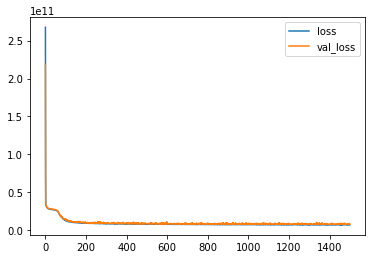

In [72]:
loss_df.plot();

In [73]:
tahmin=model.predict(x)

595/595 [==============================] - 0s 436us/step


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
r2_score(tahmin,y)

0.8206481218728356

In [76]:
(mean_squared_error(tahmin,y))**0.5

85861.12550553904

### Deep Learning - MNIST Data Set - 60 bin el yazmasi rakam

In [77]:
# yeni dosyada